<font size="12" >Sorting Algorithms</font> <br>
<font size="4" >Student: Felipe C.</font>



In [2]:
import matplotlib.pyplot as plt
import random
import time

In [3]:
# Building the vector
n = 20
range_entry = 100
entry_ins = [random.randint(0, range_entry) for _ in range(n)] #for insertion sort
entry_merge = entry_ins.copy()                                 #for merge sort
entry_unsorted = entry_ins.copy()                              #for plotting 
print("unsorted vector:",entry_merge)

unsorted vector: [59, 42, 94, 97, 21, 64, 69, 100, 52, 36, 84, 37, 15, 70, 32, 39, 91, 54, 73, 100]


# Insertion Sort

## Pseudocode: Insertion Sort

```pseudocode
Insertion-Sort(A)
    for j ← 2 to length[A]
        key ← A[j]
        i ← j − 1
        while i > 0 & A[i] > key
            A[i + 1] ← A[i]
            i ← i − 1
        A[i + 1] ← key


## Implementation:

In [4]:
def insertion_sort(vector,n):
    for i in range(1,n):
        key = vector[i]
        j= i-1
        while j>=0 and vector[j]>key:
            vector[j+1]=vector[j]
            j = j-1
        vector[j+1]=key
    return vector


# Merge Sort

## Pseudocode: Merge Sort

```pseudocode
Merge-Sort(A, p, r)
    if p < r
        q ← ⌊(p + r) / 2⌋
        Merge-Sort(A, p, q)
        Merge-Sort(A, q + 1, r)
        Merge(A, p, q, r)

Merge(A, p, q, r)
    n1 ← q - p + 1
    n2 ← r - q
    let L[1..n1 + 1] and R[1..n2 + 1] be new arrays
    for i ← 1 to n1
        L[i] ← A[p + i - 1]
    for j ← 1 to n2
        R[j] ← A[q + j]
    L[n1 + 1] ← ∞
    R[n2 + 1] ← ∞
    i ← 1
    j ← 1
    for k ← p to r
        if L[i] ≤ R[j]
            A[k] ← L[i]
            i ← i + 1
        else
            A[k] ← R[j]
            j ← j + 1


## Implementation:

In [5]:
def merge(vector,p,q,r):
    n_l = q-p+1         #length A[p:q]
    n_r = r-q           #length A[q+1:r]
    left = [None for _ in range(0,n_l)]
    right = [None for _ in range(0,n_r)]
    for i in range(0,n_l):
        left[i] = vector[p+i-1]       #copy A[p:q] into L[0:nl-1]
    for j in range(0,n_r):
        right[j] = vector[q+j]       #copy A[q+1:r] into L[0:nr-1]
    i = 0                           #i indexes the smallest remaining element in left
    j = 0                           #j indexes the smallest remaining element in right
    k = p-1                          #k indexes the location in vector to fill
    #// As long as each of the arrays left and right contains an unmerged element,
    #// copy the smallest unmerged element back into vector[p:r]. 
    while i < n_l and j < n_r:
        if left[i]<= right[j]:
            vector[k] = left[i]
            i += 1
        else:
            vector[k] = right[j]
            j += 1
        k +=1
    #// Having gone through one of left and right entirely, copy the
    #// remainder of the other to the end of vector[p:r]
    while i <n_l:
        vector[k] = left[i]
        i = i +1
        k = k+1
    while j < n_r:
        vector[k] = right[j]
        j+=1
        k+=1
    

def merge_sort(vector,p,r):
    if  p >= r:
        return 
    q = (p+r)//2 
    merge_sort(vector,p,q)
    merge_sort(vector,q+1,r)
   
    merge(vector,p,q,r)
    

In [6]:
begin_ins = time.time()

sorted_vec_ins = insertion_sort(entry_ins,n)

end_ins = time.time()

total_time_ins = end_ins - begin_ins
print("Vector sorted by insertion:",sorted_vec_ins)  
print(f"it took:{total_time_ins}")  
print("\n----------------------")
#--------------------------------

begin_merge = time.time()

merge_sort(entry_merge,1,n)

end_merge = time.time()

sorted_vec_merge = entry_merge

total_time_merge = end_merge - begin_merge
print("\n Vector sorted using mergesort:",sorted_vec_merge)  
print(f"it took:{total_time_merge}")  


Vector sorted by insertion: [15, 21, 32, 36, 37, 39, 42, 52, 54, 59, 64, 69, 70, 73, 84, 91, 94, 97, 100, 100]
it took:0.00013756752014160156

----------------------

 Vector sorted using mergesort: [15, 21, 32, 36, 37, 39, 42, 52, 54, 59, 64, 69, 70, 73, 84, 91, 94, 97, 100, 100]
it took:0.0001266002655029297


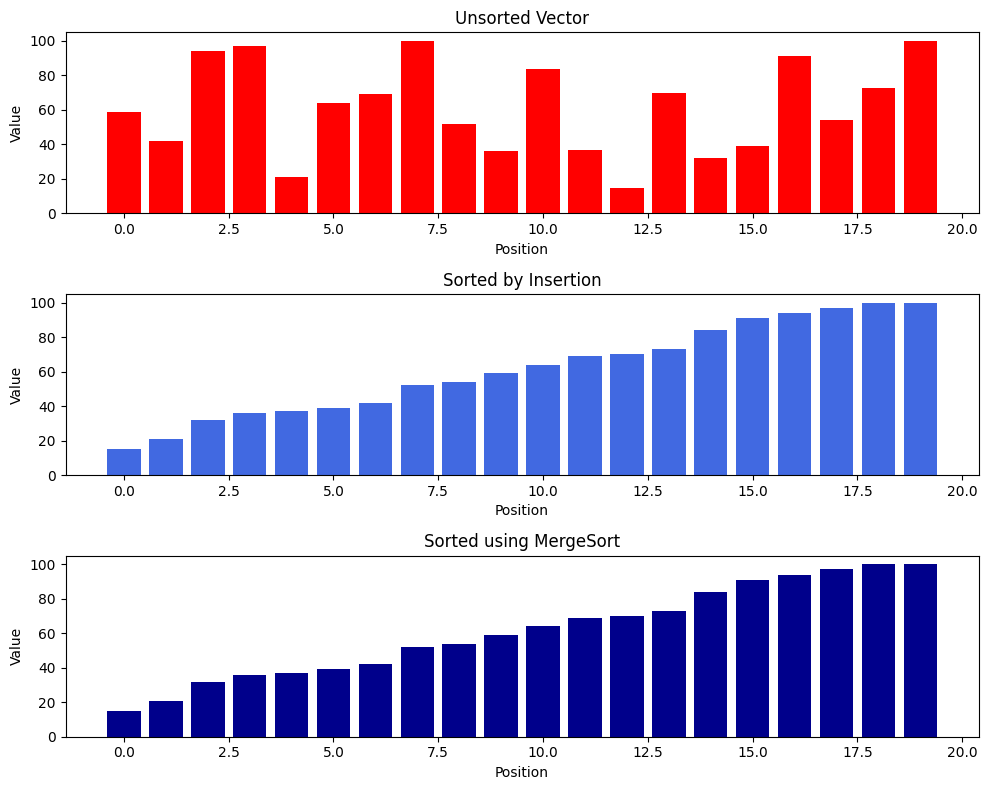

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# Unsorted
ax1.bar(range(len(entry_unsorted)), entry_unsorted,color='r')
ax1.set_xlabel('Position')
ax1.set_ylabel('Value')
ax1.set_title('Unsorted Vector')

# Insertion sort
ax2.bar(range(len(sorted_vec_ins)), sorted_vec_ins,color='royalblue')
ax2.set_xlabel('Position')
ax2.set_ylabel('Value')
ax2.set_title('Sorted by Insertion')

#Merge sort
ax3.bar(range(len(sorted_vec_merge)), sorted_vec_merge,color='darkblue')
ax3.set_xlabel('Position')
ax3.set_ylabel('Value')
ax3.set_title('Sorted using MergeSort')


plt.tight_layout()
plt.show()


## Comparison:

## Explanation of the Interactive Sorting Algorithm Comparison Tool

## Parameters and Their Effects

### Parameter: `n`
- **Description**: This parameter represents the size of the input array.
- **Effect**: 
  - Increasing `n` increases the number of elements in the array, which generally increases the time required for both sorting algorithms to complete.
  - A larger `n` provides a better understanding of the algorithms' performance on larger datasets.

### Parameter: `range_entry`
- **Description**: This parameter defines the range of values that elements in the input array can take.
- **Effect**: 
  - Changing `range_entry` affects the diversity of the array's elements.


### Parameter: `state`
- **Description**: This parameter specifies the initial state of the input array. It has two options:
  - **Complete random**: The array elements are completely randomized.
  - **Almost sorted**: The array is initially sorted, but a certain percentage of elements are randomly swapped.
- **Effect**:
  - **Complete random**: Provides a worst-case scenario for many sorting algorithms, highlighting their performance under no initial order.
  - **Almost sorted**: Mimics scenarios where data is nearly sorted, allowing for analysis of how well algorithms perform with slight disorder.

### Parameter: `random_percentage`
- **Description**: This parameter is used only when the `state` is set to `Almost sorted`. It specifies the percentage of elements that are randomly swapped to disrupt the sorted order.
- **Effect**:
  - Increasing `random_percentage` makes the array more disordered.
  - A higher percentage tests the algorithm's efficiency in dealing with greater levels of disorder within an almost sorted array.

## Visualization of Results

### Bar Chart
- **Displays**: The execution time for both Insertion Sort and Merge Sort.
- **Color Coding**: 
  - **Blue**: Represents Insertion Sort.
  - **Red**: Represents Merge Sort.
- **Effect of Parameter Changes**:
  - Changes in parameters (especially `n` and `state`) will alter the execution times shown in the bar chart, providing a visual comparison of how each algorithm performs under different conditions.

### Scatter Plot
- **Displays**: Historical execution times for different input sizes.
- **Color Coding**: 
  - **Blue Dots**: Execution times for Insertion Sort.
  - **Red Dots**: Execution times for Merge Sort.
- **Effect of Parameter Changes**:
  - As users adjust parameters and re-run comparisons, the scatter plot accumulates data points, showing trends over multiple tests.
  - This historical view helps in understanding the scalability and efficiency of each algorithm over various input sizes.


By adjusting these parameters, you can observe how the initial state and size of the array affect the performance of both sorting algorithms, thereby gaining insights into their efficiency and suitability for different types of datasets.

In [8]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from ipywidgets import interact, interactive, interact_manual

history = []
states = ['Complete random','Almost sorted']
def compare(vector,n):
    entry_sort = vector.copy()
    entry_merge = vector.copy()
    #Insertion
    begin_ins = time.time()
    sorted_vec_ins = insertion_sort(entry_sort,n)
    end_ins = time.time()
    total_time_ins = end_ins - begin_ins
    #Merge
    begin_merge = time.time()
    merge_sort(entry_merge,1,n)
    end_merge = time.time()
    total_time_merge = end_merge - begin_merge
    return total_time_ins,total_time_merge

def input(n,range_entry,state,percentage):
    if state == 'Complete random':
        return [random.randint(0, range_entry) for _ in range(n)]
    else:
        entry = [random.randint(0, range_entry) for _ in range(n)]
        merge_sort(entry,1,n)
        index = random.sample(range(n),round(n*percentage))
        for i in index:
            if i< n:
                entry[i],entry[i-1] = entry[i-1],entry[i]
        return entry
    
def my_interactive_comparison(n,range_entry,state,random_percentage):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    
    axes[0].set_ylabel('Time (s)')
    axes[0].set_title('Time Comparison')

    entry = input(n,range_entry,state,random_percentage)
    time_ins, time_merge = compare(entry,n)
    history.append((n,time_ins,time_merge))
    axes[0].bar([0, 1], [time_ins, time_merge], color=['blue', 'red'], tick_label=['Insertion Sort', 'Merge Sort'])
    axes[0].set_ylim(0,0.01)

    for j in history:
        ns = j[0]
        tem_ins = j[1]
        tem_merge = j[2]


       
        plt.scatter(ns, tem_ins, color='blue')
        plt.scatter(ns, tem_merge, color='red')

    
    plt.xlabel('n')
    plt.ylabel('Time (s)')
    plt.title('Scatter Plot of Execution times')
    plt.legend(['Insertion Time', 'Mergesort Time'])


    fig.canvas.draw()


interactive(my_interactive_comparison,n = (5,500,1),range_entry = (5,200,5),state = states,random_percentage =(0,0.95,0.01) )

interactive(children=(IntSlider(value=252, description='n', max=500, min=5), IntSlider(value=100, description=…

<function matplotlib.pyplot.show(close=None, block=None)>

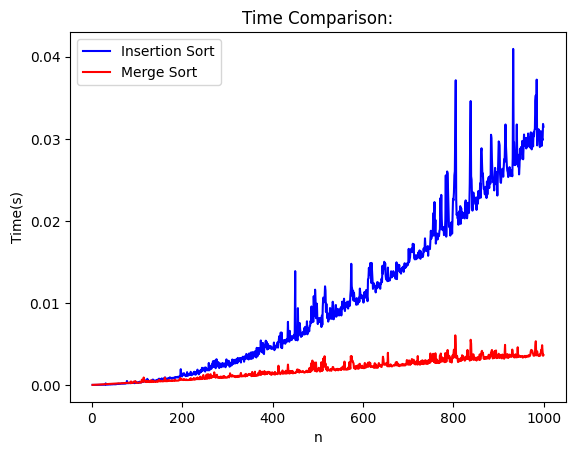

In [10]:
results_ins = []
results_merge = []
n_max = 1000
for i in range(2,n_max):
    range_number = n_max
    entry = [random.randint(0,n_max) for _ in range(i)]
    time_ins, time_merge = compare(entry,i)
    results_ins.append(time_ins)
    results_merge.append(time_merge)
   
plt.plot(range(2, n_max), results_ins, color='blue', label='Insertion Sort')
plt.plot(range(2, n_max), results_merge, color='red', label='Merge Sort')


plt.xlabel('n')
plt.ylabel('Time(s)')
plt.title('Time Comparison:')
plt.legend()  

plt.show

## How Changes Impact the Algorithms

- **Insertion Sort**: Generally performs well on small or nearly sorted arrays but can be slow on larger random arrays as shown in the interactive panel, due to its O(n^2) complexity.
- **Merge Sort**: Consistently performs well regardless of the initial order of elements due to its O(n log n) complexity, making it more suitable for larger arrays or arrays with high disorder.
